In [7]:
import numpy as np
import pandas as pd

In [6]:
a = np.random.standard_normal((9,4))
a.round(6)

array([[ 1.656713,  0.844925,  0.132802,  0.968498],
       [ 2.137729,  0.664162,  0.544221, -0.638509],
       [-2.917584,  0.0766  ,  0.136372, -0.659683],
       [ 1.787964,  0.012678,  0.591197, -1.085364],
       [ 1.565788, -0.914153, -0.852804,  0.743083],
       [ 0.591264,  0.151409,  0.375456, -0.788673],
       [-1.849638, -0.908592,  0.451962,  1.112673],
       [ 0.579896, -1.411558,  1.65498 ,  0.930525],
       [ 0.335295, -0.021709, -0.585499, -0.649938]])

In [11]:
df = pd.DataFrame(a)
df.columns = [[1,2,3,4]]
df

,1,2,3,4
0,1.656713,0.844925,0.132802,0.968498
1,2.137729,0.664162,0.544221,-0.638509
2,-2.917584,0.076600,0.136372,-0.659683
3,1.787964,0.012678,0.591197,-1.085364
4,1.565788,-0.914153,-0.852804,0.743083
5,0.591264,0.151409,0.375456,-0.788673
6,-1.849638,-0.908592,0.451962,1.112673
7,0.579896,-1.411558,1.654980,0.930525
8,0.335295,-0.021709,-0.585499,-0.649938


In [12]:
dates = pd.date_range('2015-1-1', periods=9, freq = 'M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [13]:
df.index = dates
df

,1,2,3,4
2015-01-31,1.656713,0.844925,0.132802,0.968498
2015-02-28,2.137729,0.664162,0.544221,-0.638509
2015-03-31,-2.917584,0.076600,0.136372,-0.659683
2015-04-30,1.787964,0.012678,0.591197,-1.085364
2015-05-31,1.565788,-0.914153,-0.852804,0.743083
2015-06-30,0.591264,0.151409,0.375456,-0.788673
2015-07-31,-1.849638,-0.908592,0.451962,1.112673
2015-08-31,0.579896,-1.411558,1.654980,0.930525
2015-09-30,0.335295,-0.021709,-0.585499,-0.649938


In [20]:
print(df.cumsum())
df.describe()

                   1         2         3         4
2015-01-31  1.656713  0.844925  0.132802  0.968498
2015-02-28  3.794441  1.509087  0.677023  0.329989
2015-03-31  0.876857  1.585687  0.813395 -0.329694
2015-04-30  2.664822  1.598365  1.404592 -1.415059
2015-05-31  4.230609  0.684212  0.551788 -0.671976
2015-06-30  4.821873  0.835620  0.927244 -1.460649
2015-07-31  2.972235 -0.072971  1.379206 -0.347977
2015-08-31  3.552132 -1.484530  3.034186  0.582548
2015-09-30  3.887426 -1.506239  2.448687 -0.067390


,1,2,3,4
count,9.000000,9.000000,9.000000,9.000000
mean,0.431936,-0.167360,0.272076,-0.007488
std,1.732618,0.757138,0.721974,0.912338
min,-2.917584,-1.411558,-0.852804,-1.085364
25%,0.335295,-0.908592,0.132802,-0.659683
50%,0.591264,0.012678,0.375456,-0.638509
75%,1.656713,0.151409,0.544221,0.930525
max,2.137729,0.844925,1.654980,1.112673


<Axes: >

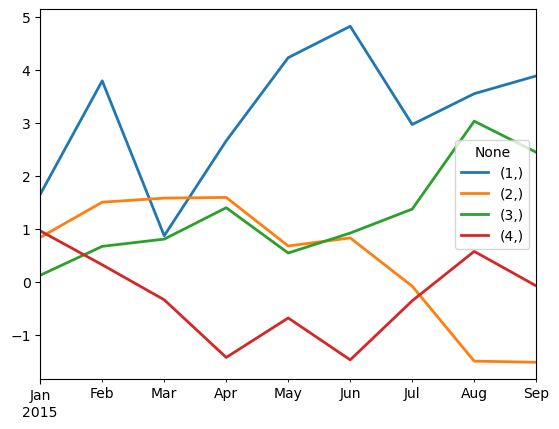

In [21]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

In [ ]:
df['Quarter'] = ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3']
df

,1,2,3,4,Quarter
2015-01-31,1.656713,0.844925,0.132802,0.968498,Q1
2015-02-28,2.137729,0.664162,0.544221,-0.638509,Q1
2015-03-31,-2.917584,0.076600,0.136372,-0.659683,Q1
2015-04-30,1.787964,0.012678,0.591197,-1.085364,Q2
2015-05-31,1.565788,-0.914153,-0.852804,0.743083,Q2
2015-06-30,0.591264,0.151409,0.375456,-0.788673,Q2
2015-07-31,-1.849638,-0.908592,0.451962,1.112673,Q3
2015-08-31,0.579896,-1.411558,1.654980,0.930525,Q3
2015-09-30,0.335295,-0.021709,-0.585499,-0.649938,Q3


In [37]:
df['Quarter']
groups = df.groupby(('Quarter'))
groups.mean()

,1,2,3,4
Quarter,,,,
Q1,0.292286,0.528562,0.271132,-0.109898
Q2,1.315005,-0.250022,0.037950,-0.376985
Q3,-0.311482,-0.780620,0.507148,0.464420


In [39]:
print(groups.max())
groups.size()

                1         2         3         4
Quarter                                        
Q1       2.137729  0.844925  0.544221  0.968498
Q2       1.787964  0.151409  0.591197  0.743083
Q3       0.579896 -0.021709  1.654980  1.112673


Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [41]:
import yfinance as yf

# Download DAX index data from Yahoo using yfinance
DAX = yf.download('^GDAXI', start='2001-01-01')

# Print structure info
DAX.info()

/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_36336/2342154746.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  DAX = yf.download('^GDAXI', start='2001-01-01')
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6207 entries, 2001-01-02 to 2025-06-12
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, ^GDAXI)   6207 non-null   float64
 1   (High, ^GDAXI)    6207 non-null   float64
 2   (Low, ^GDAXI)     6207 non-null   float64
 3   (Open, ^GDAXI)    6207 non-null   float64
 4   (Volume, ^GDAXI)  6207 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 291.0 KB


In [42]:
DAX.tail()

Price,Close,High,Low,Open,Volume
Ticker,^GDAXI,^GDAXI,^GDAXI,^GDAXI,^GDAXI
Date,,,,,
2025-06-06,24304.460938,24355.029297,24214.529297,24304.369141,41235800
2025-06-09,24174.320312,24289.509766,24097.089844,24252.259766,35991400
2025-06-10,23987.560547,24168.589844,23964.769531,24156.529297,59033500
2025-06-11,23948.900391,24151.390625,23948.570312,23996.660156,62192700
2025-06-12,23771.449219,23885.060547,23618.849609,23768.050781,0


<Axes: xlabel='Date'>

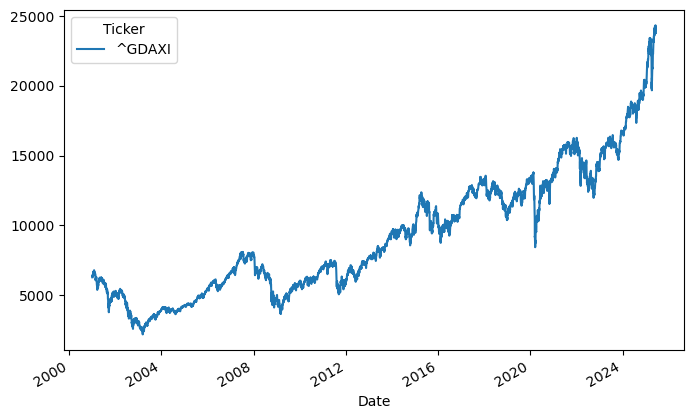

In [43]:
DAX['Close'].plot(figsize=(8,5))

In [53]:
DAX['Return'] = np.log(DAX[('Close', '^GDAXI')] / DAX[('Close', '^GDAXI')].shift(1))
DAX[['Close', 'Return']].tail()

Price,Close,Return
Ticker,^GDAXI,
Date,,
2025-06-06,24304.460938,-0.000786
2025-06-09,24174.320312,-0.005369
2025-06-10,23987.560547,-0.007756
2025-06-11,23948.900391,-0.001613
2025-06-12,23771.449219,-0.007437


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

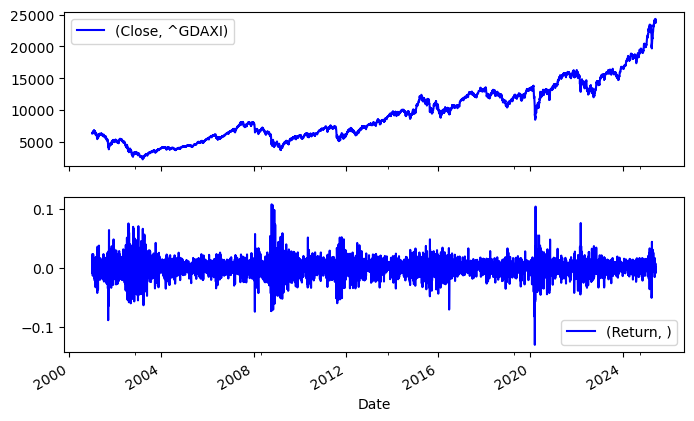

In [54]:

DAX[['Close', 'Return']].plot(subplots=True, style ='b', figsize=(8,5))

In [56]:
DAX['42d'] = DAX['Close'].rolling(window = 42).mean()
DAX['252d'] = DAX['Close'].rolling(window = 252).mean()
DAX[['Close','42d', '252d']].tail()

Price,Close,42d,252d
Ticker,^GDAXI,,
Date,,,
2025-06-06,24304.460938,22830.380208,20362.777716
2025-06-09,24174.320312,22934.777855,20385.315135
2025-06-10,23987.560547,23023.046922,20407.607282
2025-06-11,23948.900391,23124.904529,20428.710620
2025-06-12,23771.449219,23201.302595,20450.558912


<Axes: xlabel='Date'>

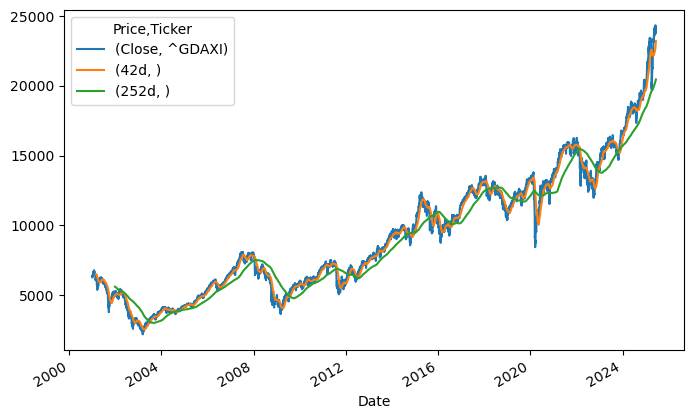

In [57]:
DAX[['Close', '42d', '252d']].plot(figsize=(8,5))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

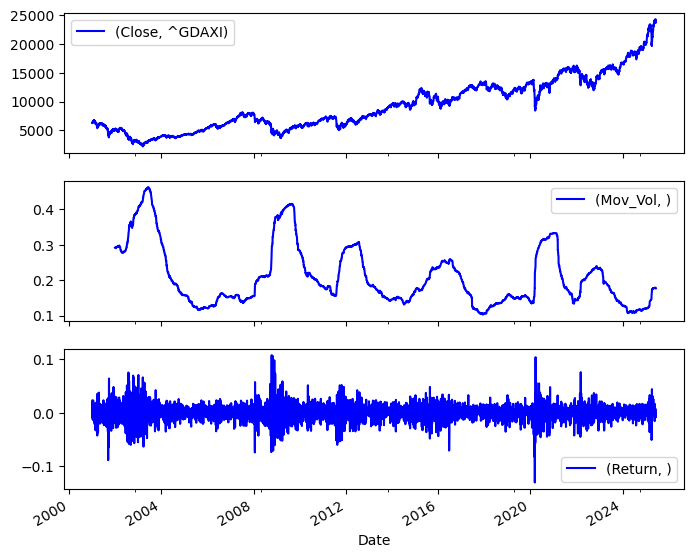

In [59]:
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(window = 252).std() *math.sqrt(252)
DAX[['Close', 'Mov_Vol','Return']].plot(subplots=True, style = 'b',figsize=(8,7))